In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

In [3]:
g = glob.glob('./dataset_o/*.csv')
fn = g[0]
fn

'./dataset_o\\CWC2018-19_Leg1_ResultsBook.csv'

In [40]:
df_list = []
for fn in g:
    df = pd.read_csv(fn,index_col=0)
    dir = os.path.basename(fn).split('.')[0]
    path = os.path.join('./dataset_o' , dir)
    s = df['filepath'].map( lambda r:os.path.join (path,r))
    s.map(lambda fn:os.path.exists(fn))
    all(s)
    df['filepath'] = s
    df['INFO'] = s.map(lambda fn:os.path.exists(fn))
    df['T'] = dir
    dfx = df.loc[df['INFO'] == True]
    print(len(dfx),fn)
    df_list.append(dfx)

348 ./dataset_o\CWC2018-19_Leg1_ResultsBook.csv
139 ./dataset_o\CWC2018-19_Leg2_ResultsBook.csv
365 ./dataset_o\CWC2018-19_Leg3_ResultsBook.csv
439 ./dataset_o\ECC2017_ResultsBook_Men_A-Division.csv
448 ./dataset_o\ECC2017_ResultsBook_Women_A-Division.csv
442 ./dataset_o\ECC2018_ResultsBook_Men_A-Division.csv
450 ./dataset_o\ECC2018_ResultsBook_Women_A-Division.csv
440 ./dataset_o\ECC2019_ResultsBook_Men_A-Division.csv
436 ./dataset_o\ECC2019_ResultsBook_Women_A-Division.csv
424 ./dataset_o\ECC2021_ResultsBook_Men_A-Division.csv
439 ./dataset_o\ECC2021_ResultsBook_Women_A-Division.csv
416 ./dataset_o\ECC2022_ResultsBook_Men_A-Division.csv
421 ./dataset_o\ECC2022_ResultsBook_Women_A-Division.csv
397 ./dataset_o\ECC2023_ResultsBook_Men_A-Division.csv
444 ./dataset_o\ECC2023_ResultsBook_Women_A-Division.csv
147 ./dataset_o\OQE2021_ResultsBook_Men.csv
899 ./dataset_o\OWG2018_ResultsBook.csv
917 ./dataset_o\OWG2022_ResultsBook.csv
63 ./dataset_o\PACC2017_ResultsBook_Men.csv
65 ./dataset_o\P

In [41]:
dg = pd.concat(df_list)
dg.shape

C:\Users\ghost\AppData\Local\Temp\ipykernel_336\183881652.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  dg = pd.concat(df_list)
C:\Users\ghost\AppData\Local\Temp\ipykernel_336\183881652.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dg = pd.concat(df_list)


(16629, 10)

In [74]:
j = []
for i , xdf in dg.groupby(['T','page']):
    xdf['red_posiotn'] = 0
    xdf['red_posiotn'] = (xdf['red'].cumsum() - xdf['yellow'].cumsum()).shift(1)
    j.append(xdf)

In [77]:
dq = pd.concat(j)

In [82]:
dq['red_posiotn'] = dq['red_posiotn'].fillna(0)

<Axes: >

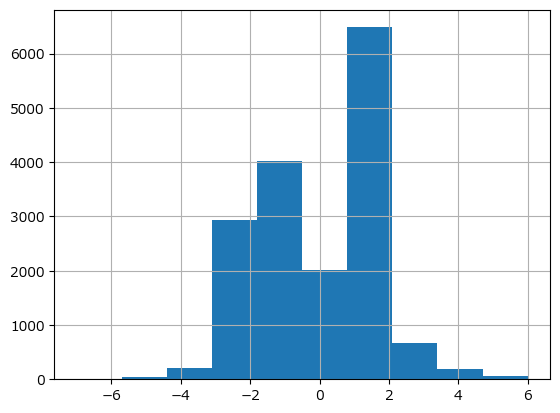

In [84]:
dq['red_diff'].hist()

In [104]:
dq['red_diff'].value_counts()

red_diff
 1.0    4134
-1.0    4021
 2.0    2350
-2.0    2258
 0.0    2008
-3.0     681
 3.0     676
-4.0     202
 4.0     185
 5.0      52
-5.0      43
 6.0       8
-6.0       7
-7.0       1
Name: count, dtype: int64

In [93]:
dq['red_posiotn'].value_counts()

red_posiotn
 0.0     4700
-1.0     2324
 1.0     2310
-2.0     1660
 2.0     1611
 3.0      939
-3.0      924
 4.0      561
-4.0      525
 5.0      296
-5.0      242
 6.0      127
-6.0      122
 7.0       65
-7.0       56
 8.0       41
-8.0       29
 9.0       21
-9.0       16
 10.0      14
-10.0       9
-11.0       8
 11.0       6
-12.0       5
 12.0       4
-13.0       4
-15.0       3
 14.0       2
 13.0       1
-14.0       1
-21.0       1
 15.0       1
 19.0       1
Name: count, dtype: int64

In [94]:
dq.loc[dq['red_posiotn'] > 10]

,ends,red,yellow,red_diff,remain_ends,last_stone_is_red,page,filepath,INFO,T,red_posiotn
7,8,0.0,0.0,0.0,1,False,471,./dataset_o\ECC2017_ResultsBook_Men_A-Division...,True,ECC2017_ResultsBook_Men_A-Division,11.0
5,6,0.0,1.0,-1.0,3,False,516,./dataset_o\ECC2023_ResultsBook_Women_A-Divisi...,True,ECC2023_ResultsBook_Women_A-Division,12.0
8,9,1.0,0.0,1.0,0,False,147,./dataset_o\PACC2018_ResultsBook_Men\geme147en...,True,PACC2018_ResultsBook_Men,11.0
7,8,0.0,2.0,-2.0,1,False,36,./dataset_o\PACC2018_ResultsBook_Women\geme36e...,True,PACC2018_ResultsBook_Women,12.0
5,6,3.0,0.0,3.0,3,False,209,./dataset_o\PACC2018_ResultsBook_Women\geme209...,True,PACC2018_ResultsBook_Women,13.0
3,4,1.0,0.0,1.0,5,False,266,./dataset_o\PACC2018_ResultsBook_Women\geme266...,True,PACC2018_ResultsBook_Women,14.0
4,5,4.0,0.0,4.0,4,False,266,./dataset_o\PACC2018_ResultsBook_Women\geme266...,True,PACC2018_ResultsBook_Women,15.0
5,6,1.0,0.0,1.0,3,False,266,./dataset_o\PACC2018_ResultsBook_Women\geme266...,True,PACC2018_ResultsBook_Women,19.0
5,6,3.0,0.0,3.0,3,False,95,./dataset_o\PACC2019_ResultsBook_Men\geme95end...,True,PACC2019_ResultsBook_Men,11.0
6,7,0.0,2.0,-2.0,2,False,95,./dataset_o\PACC2019_ResultsBook_Men\geme95end...,True,PACC2019_ResultsBook_Men,14.0


In [103]:
dq.loc[ (dq['page'] == 363) & (dq['T'] == 'PCCC2022_ResultsBook_Women_A-Division')]

,ends,red,yellow,red_diff,remain_ends,last_stone_is_red,page,filepath,INFO,T,red_posiotn
0,1,4.0,0.0,4.0,8,True,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,0.0
1,2,1.0,0.0,1.0,7,False,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,4.0
2,3,1.0,0.0,1.0,6,False,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,5.0
3,4,3.0,0.0,3.0,5,False,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,6.0
4,5,0.0,1.0,-1.0,4,False,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,9.0
5,6,3.0,0.0,3.0,3,True,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,8.0
6,7,3.0,0.0,3.0,2,False,363,./dataset_o\PCCC2022_ResultsBook_Women_A-Divis...,True,PCCC2022_ResultsBook_Women_A-Division,11.0
